In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
income_data = pd.read_csv(r"C:\Users\kd67152\Desktop\Datasets\Cluster\document.csv")
income_data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


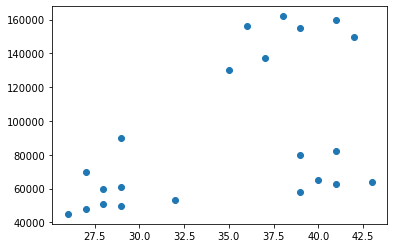

In [3]:
plt.scatter(income_data["Age"],income_data["Income($)"])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(income_data[["Age","Income($)"]])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
income_data["Cluster"] = y_pred
income_data.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


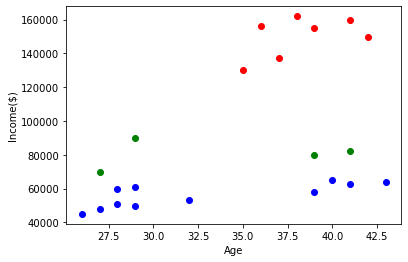

In [7]:
income_data1 = income_data[income_data.Cluster==0]
income_data2 = income_data[income_data.Cluster==1]
income_data3 = income_data[income_data.Cluster==2]
plt.scatter(income_data1["Age"],income_data1["Income($)"],color = "green",)
plt.scatter(income_data2["Age"],income_data2["Income($)"],color = "red")
plt.scatter(income_data3["Age"],income_data3["Income($)"],color = "blue")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [8]:
scaler = MinMaxScaler()
scaler.fit(income_data[["Income($)"]])
income_data["Income($)"] = scaler.transform(income_data[["Income($)"]])

scaler.fit(income_data[["Age"]])
income_data["Age"] = scaler.transform(income_data[["Age"]])

In [9]:
income_data

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(income_data[["Age","Income($)"]])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [11]:
income_data["Cluster"] = y_pred
income_data

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [12]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

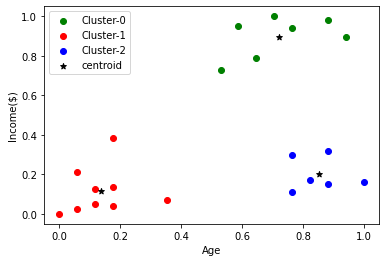

In [13]:
income_data1 = income_data[income_data.Cluster==0]
income_data2 = income_data[income_data.Cluster==1]
income_data3 = income_data[income_data.Cluster==2]
plt.scatter(income_data1["Age"],income_data1["Income($)"],color = "green",label="Cluster-0")
plt.scatter(income_data2["Age"],income_data2["Income($)"],color = "red",label="Cluster-1")
plt.scatter(income_data3["Age"],income_data3["Income($)"],color = "blue",label="Cluster-2")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "black",marker="*",label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

In [25]:
km.predict([[0.2,.2]])

C:\Users\kd67152\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [21]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(income_data[["Age","Income($)"]])
    sse.append(km.inertia_)

C:\Users\kd67152\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.3625079900797329,
 0.2621792762345213,
 0.22020960864009398,
 0.1735559655531264,
 0.13949051988045866,
 0.10383752586603562]

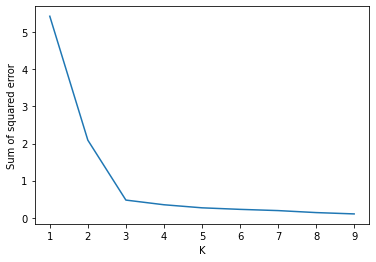

In [17]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_range,sse)

In [26]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(income_data[["Age","Income($)"]])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [28]:
income_data["Cluster"] = y_pred
income_data

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [32]:
km.predict([[0.941176,0.897436]])

C:\Users\kd67152\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])